In [2]:
import ROOT

Welcome to JupyROOT 6.26/00


## Estructura:


Se aplicaron los cortes siguiendo la siguiente secuencia:

1. Requerir una buena reconstrucción de vertices: Carpeta NRecoVertex.
2. Requerir el trigger (IsoMu27): Carpeta NRecoTriggers1.
3. Requerir un muon: Carpeta NRecoMuon1.
4. Veto en electrones: Carpeta NRecoElectron1.
5. Veto en taus: Carpeta NRecoTau1.
6. Requerir 2 Bjets: Carpeta NRecoBJet.
7. Corte del MET: METCut.


Los eventos que pasan un corte son la entrada del siguiente corte.Al leer los histogramas de cada carpeta pueden ver como va evolucionando la región de control.


Los resultados entregados previamente corresponden a lo almacenado en la tabla METCut.

In [25]:
%%cpp

#include <TMath.h>

// Indicar el histograma que desean usar. No olvidar que se debe especificar el folder del cuál se leerá la información.
TString Histogram("NRecoVertex/Muon1Eta");


TFile *SR0 = new TFile("Data.root");
    TH1F *Data_M = (TH1F*)SR0->Get(Histogram);
    
TFile *SR1 = new TFile("DY+Jets.root");
    TH1F *DY_entry = (TH1F*)SR1->Get(Histogram);
    
TFile *SR2 = new TFile("W+Jets.root");
    TH1F *WJ_entry = (TH1F*)SR2->Get(Histogram);
    
TFile *SR3 = new TFile("tbar{t}.root");
    TH1F *TT_entry = (TH1F*)SR3->Get(Histogram);
    
TFile *SR4 = new TFile("SingleTop.root");
    TH1F *ST_entry = (TH1F*)SR4->Get(Histogram);
    
TFile *SR5 = new TFile("VV.root");
    TH1F *VV_entry = (TH1F*)SR5->Get(Histogram);
    
TFile *SR6 = new TFile("Higgs.root");
    TH1F *Higgs_entry = (TH1F*)SR6->Get(Histogram);


In [26]:
%%cpp


int nb = Data_M->GetXaxis()->GetNbins();


Double_t error_data;
Double_t data = Data_M->IntegralAndError(0, nb+1, error_data, ""); 


Double_t error_dy;
Double_t dy = DY_entry->IntegralAndError(0, nb+1, error_dy, ""); 

    
Double_t error_wj;
Double_t wj = WJ_entry->IntegralAndError(0, nb+1, error_wj, ""); 


Double_t error_tt;
Double_t tt = TT_entry->IntegralAndError(0, nb+1, error_tt, ""); 

    
Double_t error_st;
Double_t st = ST_entry->IntegralAndError(0, nb+1, error_st, ""); 

    
Double_t error_vv;
Double_t vv = VV_entry->IntegralAndError(0, nb+1, error_vv, "");


Double_t error_higgs;
Double_t higgs = Higgs_entry->IntegralAndError(0, nb+1, error_higgs, ""); 


  
double error_background = TMath::Sqrt(TMath::Power(error_dy,2) + TMath::Power(error_wj,2) + TMath::Power(error_tt,2) + TMath::Power(error_st,2) + TMath::Power(error_vv,2) + TMath::Power(error_higgs,2)); 
double background = dy + wj + tt + st + vv + higgs;

double ratio = data/background;
error_ratio = ratio*TMath::Sqrt(TMath::Power((TMath::Sqrt(data)/data),2) + TMath::Power(error_background/background,2));
        
        
// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra los resultados que se obtienen al leer los histogramas" << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << tt << " +- "<< error_tt << "\t\t" << (tt/background)* 100 << " %" << endl;
cout << "ST:   " << "\t\t" << st << " +- "<< error_st << "\t\t" << (st/background)* 100 << " %" << endl;
cout << "WJ:   " << "\t\t" << wj << " +- "<< error_wj << "\t\t" << (wj/background)* 100 << " %" << endl;
cout << "DY:   " << "\t\t" << dy << " +- "<< error_dy << "\t\t" << (dy/background)* 100 << " %" << endl;
cout << "VV:   " << "\t\t" << vv << " +- "<< error_vv << "\t\t" << (vv/background)* 100 << " %" << endl;
cout << "Higgs:" << "\t\t" << higgs << " +- "<< error_higgs << "\t\t" << (higgs/background)* 100 << " %" << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << data << " +- " << " ... " << "\t\t" << " ... " << endl;
cout << "Back: " << "\t\t" << background << " +- " << error_background << "\t\t" << (background/background)* 100 << " %" << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << ratio << " +- " << error_ratio << endl;


:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra los resultados que se obtienen al leer los histogramas
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		3808645.844 +- 380.7258148		19.28290037 %
ST:   		724756.2028 +- 319.7625685		3.669388603 %
WJ:   		11669658.02 +- 3364.244663		59.08264042 %
DY:   		3008730.605 +- 904.2891705		15.23298697 %
VV:   		404120.1655 +- 351.8311185		2.046031374 %
Higgs:		135505.0352 +- 626.8696625		0.6860522614 %
----------------------------------------------------------------
Data: 		265253082 +-  ... 		 ... 
Back: 		19751415.87 +- 3591.633613		100 %
----------------------------------------------------------------
Data/Back:	13.42957304 +- 0.002577513841


### Resultados entregados (solo cambie el orden de los backgrounds)

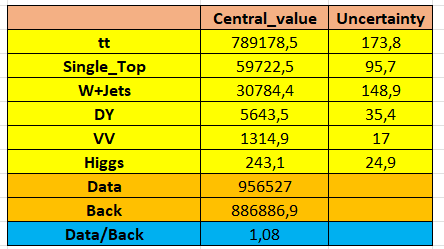


### Resultados de la gráfica de eta: Histograms = "METCut/Muon1Pt"

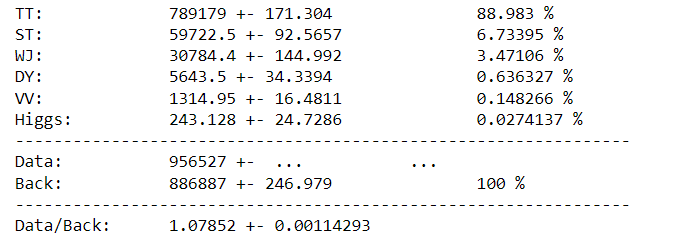


### Resultados de la gráfica de eta: Histograms = "METCut/Muon1Eta"

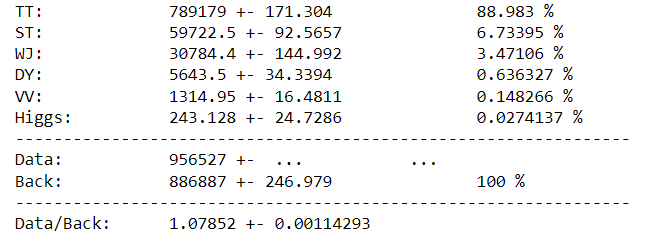



##### Probando Histograms = "NRecoTau1/Muon1Eta"

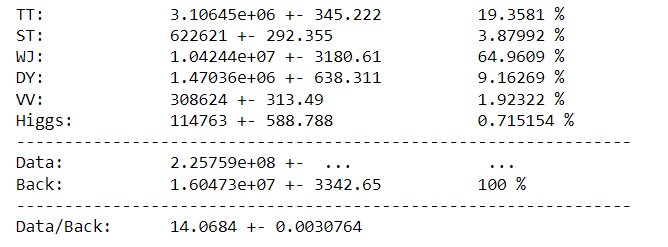

## Número inicial de eventos


La información del número de eventos inicial se puede encontrar en el bin 0 de los histogramas events. Por ejemplo, ya que el primer corte es NRecoVertex, el número de eventos inicial está almacenado en el Bin[0] de:

TString events("NRecoVertex/Events");



In [41]:
%%cpp

TString events("NRecoVertex/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 1;

double events_data = events_D->GetBinContent(bin); 
double events_dy = events_DY->GetBinContent(bin); 
double events_wj = events_WJ->GetBinContent(bin); 
double events_tt = events_TT->GetBinContent(bin); 
double events_st = events_ST->GetBinContent(bin); 
double events_vv = events_VV->GetBinContent(bin); 
double events_higgs = events_Higgs->GetBinContent(bin); 

double events_background = events_dy + events_wj + events_tt + events_st + events_vv + events_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos de entrada " << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << events_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << events_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << events_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << events_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << events_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << events_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << events_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << events_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << events_data/events_background  << endl;



:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos de entrada 
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		34494353.2
ST:   		10986766.12
WJ:   		77969873.08
DY:   		9087575.865
VV:   		4799650.8
Higgs:		1520283.48
----------------------------------------------------------------
Data: 		769074436
Back: 		138858502.5
----------------------------------------------------------------
Data/Back:	5.538547672


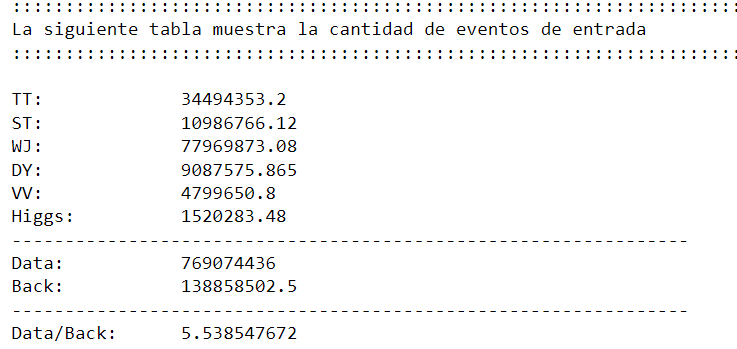


##### Revisando en DAS tenemos para Data:

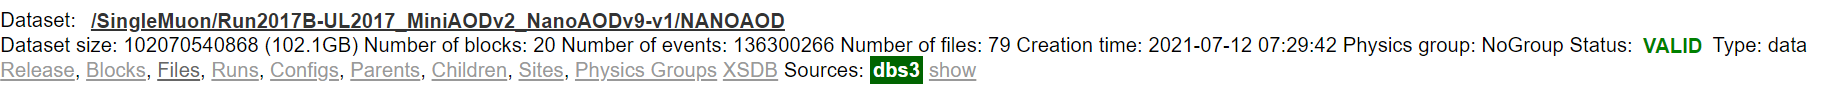
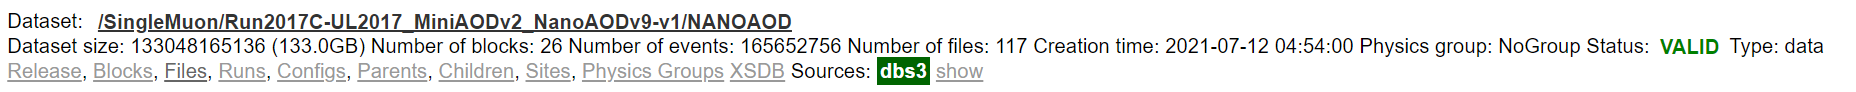
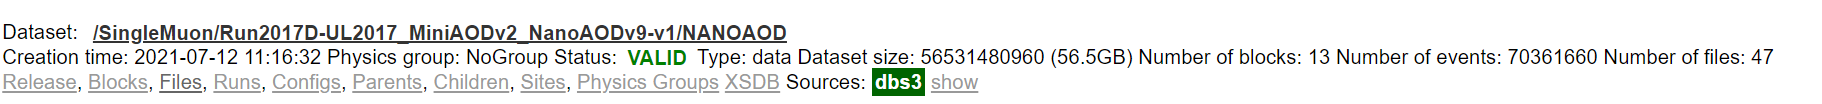
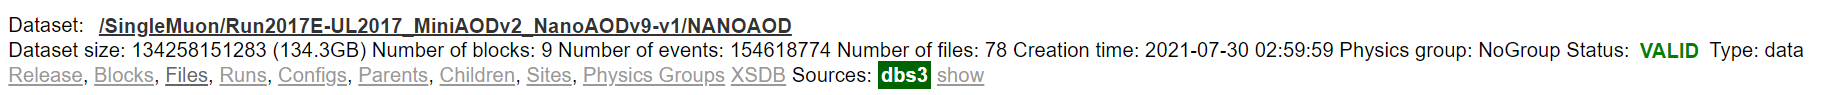
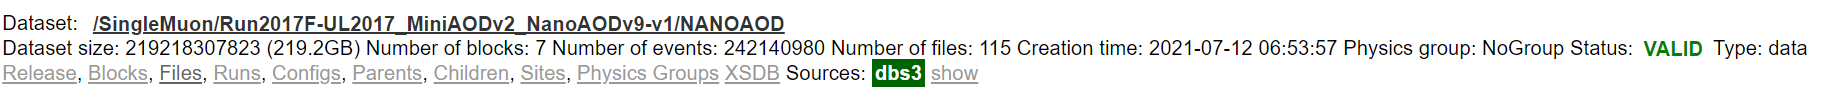

Sumando el número de eventos tenemos:

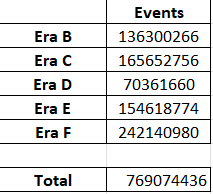


Vemos que los números obtenidos de los archivos root corresponden 1 a 1 con lo esperado.

In [50]:
%%cpp

TString events("NRecoVertex/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 2;
double vertex_data = events_D->GetBinContent(bin); 
double vertex_dy = events_DY->GetBinContent(bin); 
double vertex_wj = events_WJ->GetBinContent(bin); 
double vertex_tt = events_TT->GetBinContent(bin); 
double vertex_st = events_ST->GetBinContent(bin); 
double vertex_vv = events_VV->GetBinContent(bin); 
double vertex_higgs = events_Higgs->GetBinContent(bin); 

double vertex_background = vertex_dy + vertex_wj + vertex_tt + vertex_st + vertex_vv + vertex_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos que pasan el requerimiento de buenos vertices" << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << vertex_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << vertex_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << vertex_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << vertex_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << vertex_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << vertex_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << vertex_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << vertex_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << vertex_data/vertex_background  << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos que pasan el requerimiento de buenos vertices
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		31698090.55
ST:   		10223323.25
WJ:   		74916577.21
DY:   		8555954.056
VV:   		4677685.817
Higgs:		1489161.565
----------------------------------------------------------------
Data: 		738690949
Back: 		131560792.4
----------------------------------------------------------------
Data/Back:	5.614825932


In [51]:
%%cpp

TString events("NRecoTriggers1/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 2;
double trigger_data = events_D->GetBinContent(bin); 
double trigger_dy = events_DY->GetBinContent(bin); 
double trigger_wj = events_WJ->GetBinContent(bin); 
double trigger_tt = events_TT->GetBinContent(bin); 
double trigger_st = events_ST->GetBinContent(bin); 
double trigger_vv = events_VV->GetBinContent(bin); 
double trigger_higgs = events_Higgs->GetBinContent(bin); 

double trigger_background = trigger_dy + trigger_wj + trigger_tt + trigger_st + trigger_vv + trigger_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos que pasan el trigger " << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << trigger_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << trigger_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << trigger_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << trigger_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << trigger_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << trigger_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << trigger_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << trigger_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << trigger_data/trigger_background  << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos que pasan el trigger 
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		4068480.185
ST:   		822839.0021
WJ:   		12839238.45
DY:   		2376651.198
VV:   		441321.6637
Higgs:		182842.0914
----------------------------------------------------------------
Data: 		479477320
Back: 		20731372.59
----------------------------------------------------------------
Data/Back:	23.12810297


In [52]:
%%cpp

TString events("NRecoMuon1/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 2;
double muon_data = events_D->GetBinContent(bin); 
double muon_dy = events_DY->GetBinContent(bin); 
double muon_wj = events_WJ->GetBinContent(bin); 
double muon_tt = events_TT->GetBinContent(bin); 
double muon_st = events_ST->GetBinContent(bin); 
double muon_vv = events_VV->GetBinContent(bin); 
double muon_higgs = events_Higgs->GetBinContent(bin); 

double muon_background = muon_dy + muon_wj + muon_tt + muon_st + muon_vv + muon_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos que pasan el requerimiento de 1 muon " << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << muon_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << muon_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << muon_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << muon_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << muon_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << muon_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << muon_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << muon_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << muon_data/muon_background  << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos que pasan el requerimiento de 1 muon 
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		3207264.856
ST:   		633479.6564
WJ:   		10498304.71
DY:   		1491968.588
VV:   		317662.6263
Higgs:		117264.2066
----------------------------------------------------------------
Data: 		226726365
Back: 		16265944.64
----------------------------------------------------------------
Data/Back:	13.93871491


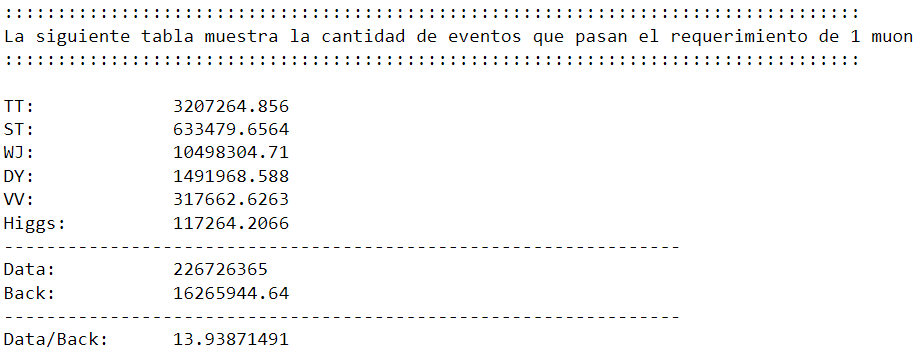

In [53]:
%%cpp

TString events("NRecoElectron1/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 2;
double electron_data = events_D->GetBinContent(bin); 
double electron_dy = events_DY->GetBinContent(bin); 
double electron_wj = events_WJ->GetBinContent(bin); 
double electron_tt = events_TT->GetBinContent(bin); 
double electron_st = events_ST->GetBinContent(bin); 
double electron_vv = events_VV->GetBinContent(bin); 
double electron_higgs = events_Higgs->GetBinContent(bin); 

double electron_background = electron_dy + electron_wj + electron_tt + electron_st + electron_vv + electron_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos que pasan el veto de electrones" << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << electron_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << electron_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << electron_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << electron_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << electron_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << electron_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << electron_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << electron_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << electron_data/electron_background  << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos que pasan el veto de electrones
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		3180294.963
ST:   		631515.5603
WJ:   		10493017.7
DY:   		1490217.618
VV:   		315614.4638
Higgs:		116566.7071
----------------------------------------------------------------
Data: 		226680228
Back: 		16227227.01
----------------------------------------------------------------
Data/Back:	13.96912904


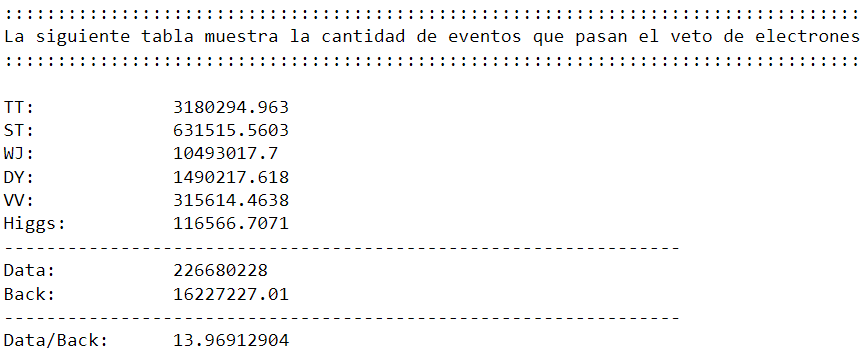

In [54]:
%%cpp

TString events("NRecoTau1/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 2;
double tau_data = events_D->GetBinContent(bin); 
double tau_dy = events_DY->GetBinContent(bin); 
double tau_wj = events_WJ->GetBinContent(bin); 
double tau_tt = events_TT->GetBinContent(bin); 
double tau_st = events_ST->GetBinContent(bin); 
double tau_vv = events_VV->GetBinContent(bin); 
double tau_higgs = events_Higgs->GetBinContent(bin); 

double tau_background = tau_dy + tau_wj + tau_tt + tau_st + tau_vv + tau_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos que pasan el veto de taus " << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << tau_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << tau_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << tau_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << tau_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << tau_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << tau_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << tau_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << tau_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << tau_data/tau_background  << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos que pasan el veto de taus 
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		3106451.271
ST:   		622620.6298
WJ:   		10424439.76
DY:   		1470360.318
VV:   		308624.081
Higgs:		114762.6401
----------------------------------------------------------------
Data: 		225758905
Back: 		16047258.7
----------------------------------------------------------------
Data/Back:	14.06837823


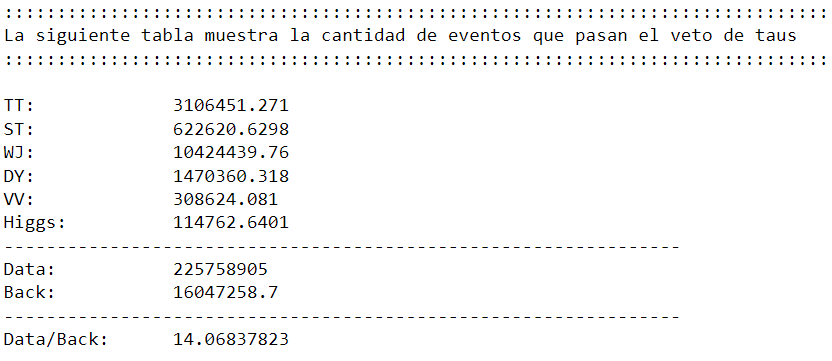

In [55]:
%%cpp

TString events("NRecoBJet/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 2;
double b_data = events_D->GetBinContent(bin); 
double b_dy = events_DY->GetBinContent(bin); 
double b_wj = events_WJ->GetBinContent(bin); 
double b_tt = events_TT->GetBinContent(bin); 
double b_st = events_ST->GetBinContent(bin); 
double b_vv = events_VV->GetBinContent(bin); 
double b_higgs = events_Higgs->GetBinContent(bin); 

double b_background = b_dy + b_wj + b_tt + b_st + b_vv + b_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos que pasan los cortes de los bjets" << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << b_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << b_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << b_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << b_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << b_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << b_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << b_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << b_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << b_data/b_background  << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos que pasan los cortes de los bjets
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		1287128.623
ST:   		107049.1269
WJ:   		61709.73166
DY:   		22015.2479
VV:   		3115.621964
Higgs:		516.1328234
----------------------------------------------------------------
Data: 		1763166
Back: 		1481534.484
----------------------------------------------------------------
Data/Back:	1.190094472


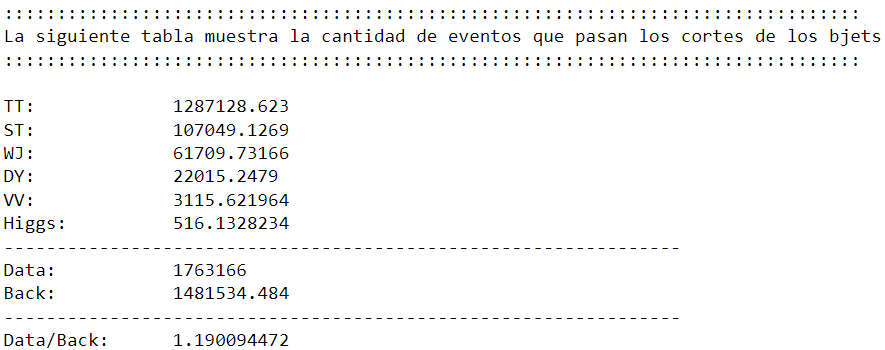

In [56]:
%%cpp

TString events("METCut/Events");


TH1F *events_D = (TH1F*)SR0->Get(events);
TH1F *events_DY = (TH1F*)SR1->Get(events);
TH1F *events_WJ = (TH1F*)SR2->Get(events);
TH1F *events_TT = (TH1F*)SR3->Get(events);
TH1F *events_ST = (TH1F*)SR4->Get(events);
TH1F *events_VV = (TH1F*)SR5->Get(events);
TH1F *events_Higgs = (TH1F*)SR6->Get(events);
    
    
// El primer bin es el bin 0 en ROOT.
int bin = 2;
double met_data = events_D->GetBinContent(bin); 
double met_dy = events_DY->GetBinContent(bin); 
double met_wj = events_WJ->GetBinContent(bin); 
double met_tt = events_TT->GetBinContent(bin); 
double met_st = events_ST->GetBinContent(bin); 
double met_vv = events_VV->GetBinContent(bin); 
double met_higgs = events_Higgs->GetBinContent(bin); 

double met_background = met_dy + met_wj + met_tt + met_st + met_vv + met_higgs;

// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra la cantidad de eventos que pasan el corte del MET" << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << std::setprecision(10) << met_tt  << endl;
cout << "ST:   " << "\t\t" << std::setprecision(10) << met_st  << endl;
cout << "WJ:   " << "\t\t" << std::setprecision(10) << met_wj  << endl;
cout << "DY:   " << "\t\t" << std::setprecision(10) << met_dy  << endl;
cout << "VV:   " << "\t\t" << std::setprecision(10) << met_vv  << endl;
cout << "Higgs:" << "\t\t" << std::setprecision(10) << met_higgs  << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << std::setprecision(10) << met_data  << endl;
cout << "Back: " << "\t\t" << std::setprecision(10) << met_background  << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << met_data/met_background  << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra la cantidad de eventos que pasan el corte del MET
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		789178.5404
ST:   		59722.52207
WJ:   		30784.40482
DY:   		5643.500688
VV:   		1314.949914
Higgs:		243.1284767
----------------------------------------------------------------
Data: 		956527
Back: 		886887.0464
----------------------------------------------------------------
Data/Back:	1.078521785


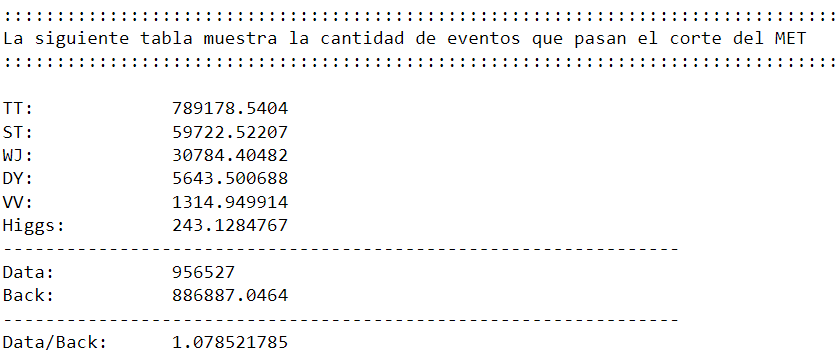